<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

In [34]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [35]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

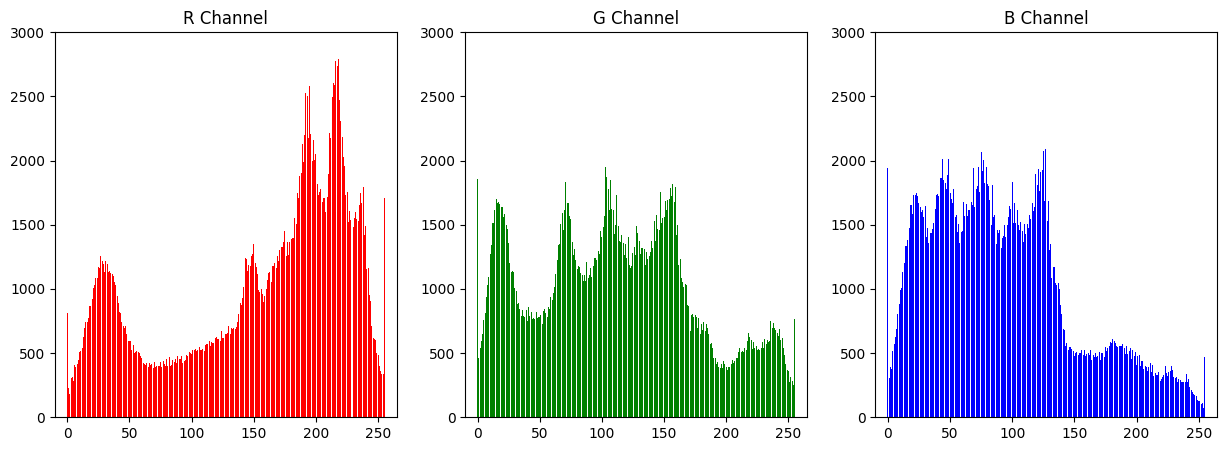

In [36]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

image_np = np.array(image)

r_channel = image_np[:,:,0]
g_channel = image_np[:,:,1]
b_channel = image_np[:,:,2]

r_hist = np.bincount(r_channel.ravel(), minlength=256)
g_hist = np.bincount(g_channel.ravel(), minlength=256)
b_hist = np.bincount(b_channel.ravel(), minlength=256)

x = np.arange(256)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.bar(x, r_hist, color='red')
plt.title('R Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.subplot(1,3,2)
plt.bar(x, g_hist, color='green')
plt.title('G Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.subplot(1,3,3)
plt.bar(x, b_hist, color='blue')
plt.title('B Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


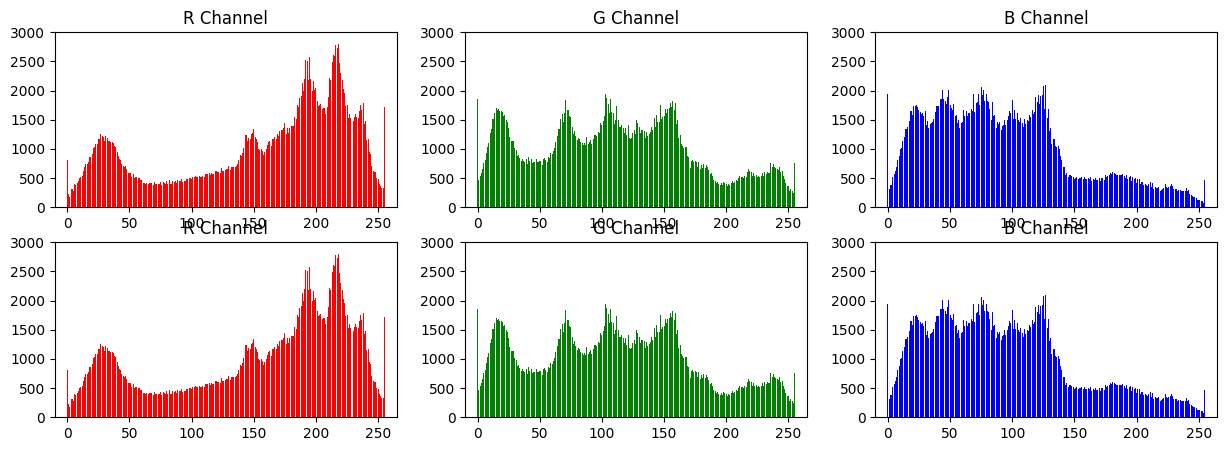

In [38]:
image1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

image1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

image1_np = np.array(image)

r1_channel = image_np[:, :, 0]
g1_channel = image_np[:, :, 1]
b1_channel = image_np[:, :, 2]

r1_hist, _ = np.histogram(r1_channel.ravel(), bins=256, range=(0, 255))
g1_hist, _ = np.histogram(g1_channel.ravel(), bins=256, range=(0, 255))
b1_hist, _ = np.histogram(b1_channel.ravel(), bins=256, range=(0, 255))

x = np.arange(256)

plt.figure(figsize=(15, 5))

plt.subplot(2,3,1)
plt.bar(x, r_hist, color='red')
plt.title('R Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.subplot(2,3,2)
plt.bar(x, g_hist, color='green')
plt.title('G Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.subplot(2,3,3)
plt.bar(x, b_hist, color='blue')
plt.title('B Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.subplot(2,3,4)
plt.bar(x, r1_hist, color='red')
plt.title('R Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.subplot(2,3,5)
plt.bar(x, g1_hist, color='green')
plt.title('G Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.subplot(2,3,6)
plt.bar(x, b1_hist, color='blue')
plt.title('B Channel')
plt.xlim([-10,265])
plt.ylim([0,3000])

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

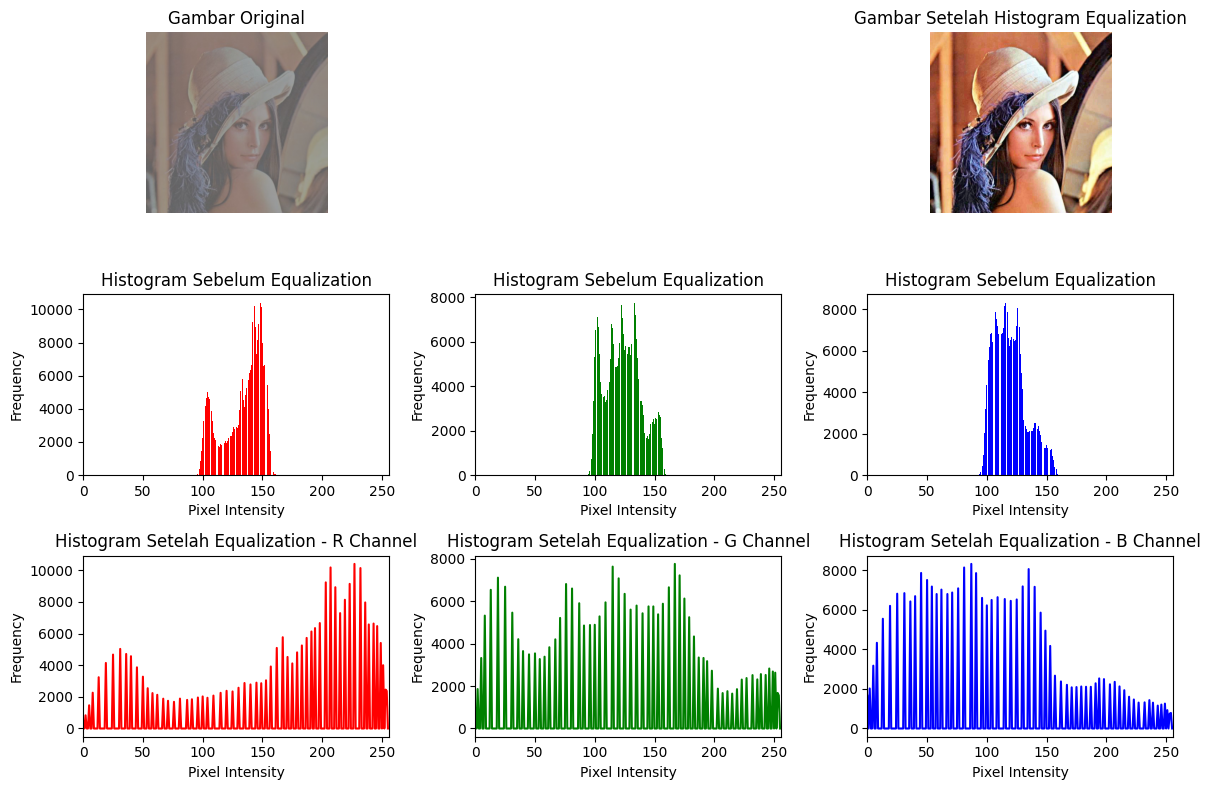

In [39]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()

cdf_normalized = cdf * hist.max() / cdf.max()

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

img_equalized = cdf_final[img]

plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(img_equalized)
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.subplot(3, 3, 3 + i + 1)
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color)
    plt.title('Histogram Sebelum Equalization')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

for i, color in enumerate(colors):
    plt.subplot(3, 3, 6 + i + 1)
    hist_eq = cv.calcHist([img_equalized], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histogram Setelah Equalization - {color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

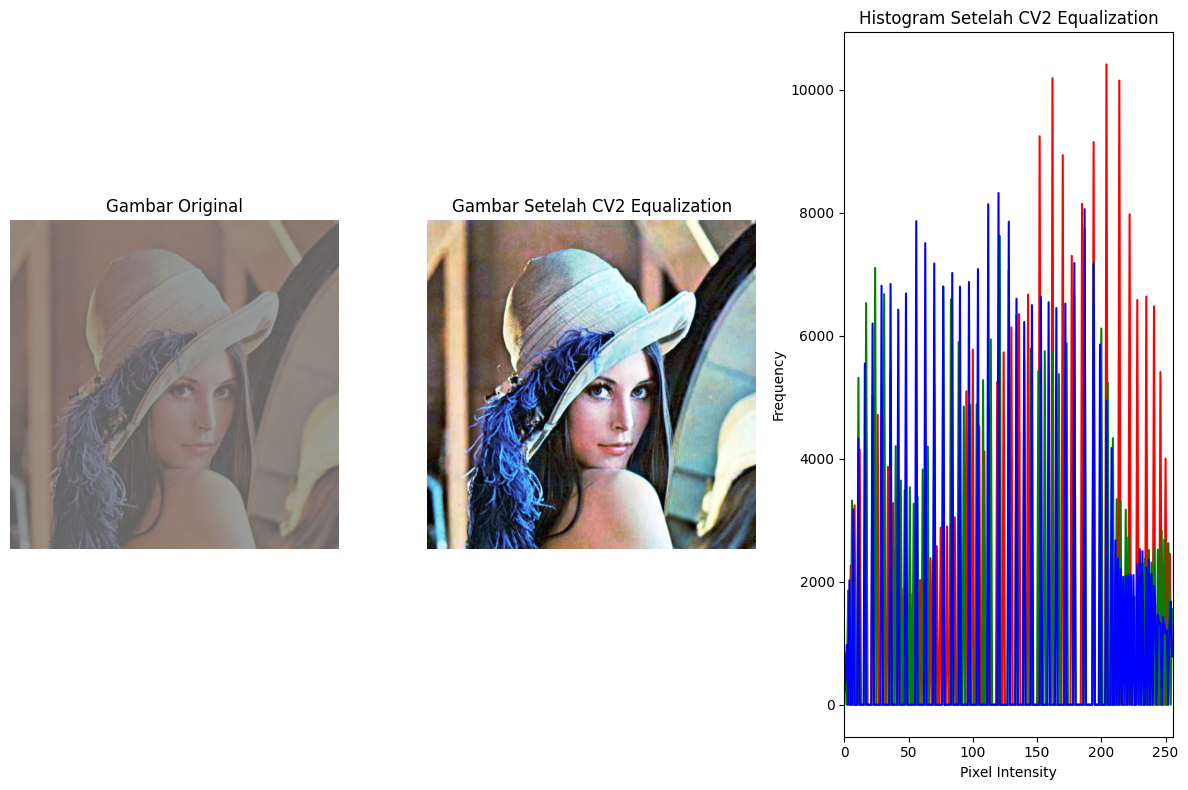

In [40]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

channels = cv.split(img)

equalized_channels = [cv.equalizeHist(channel) for channel in channels]

img_equalized_cv = cv.merge(equalized_channels)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_equalized_cv)
plt.title('Gambar Setelah CV2 Equalization')
plt.axis('off')

plt.subplot(1, 3, 3)
for i, color in enumerate(('r', 'g', 'b')):
    hist_eq = cv.calcHist([equalized_channels[i]], [0], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
plt.title('Histogram Setelah CV2 Equalization')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

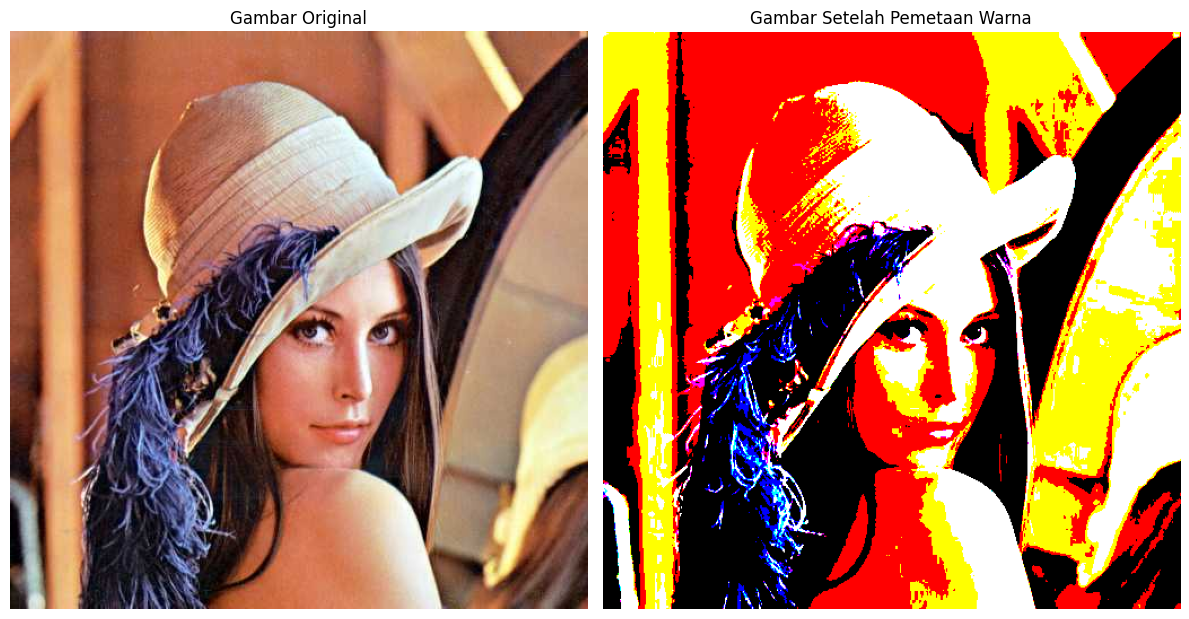

In [41]:
def get_nearest_color(r, g, b):
    colors = {
        "black": [0, 0, 0],
        "green": [0, 255, 0],
        "yellow": [255, 255, 0],
        "blue": [0, 0, 255],
        "cyan": [0, 255, 255],
        "magenta": [255, 0, 255],
        "red": [255, 0 ,0 ],
        "white": [255, 255, 255]
    }

    distances = {color: np.linalg.norm(np.array([r, g, b]) - np.array(rgb)) for color, rgb in colors.items()}
    nearest_color = min(distances, key=distances.get)
    return colors[nearest_color]

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_mapped = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        nearest_rgb = get_nearest_color(r, g, b)
        img_mapped[i, j] = nearest_rgb

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mapped)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

plt.tight_layout()
plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

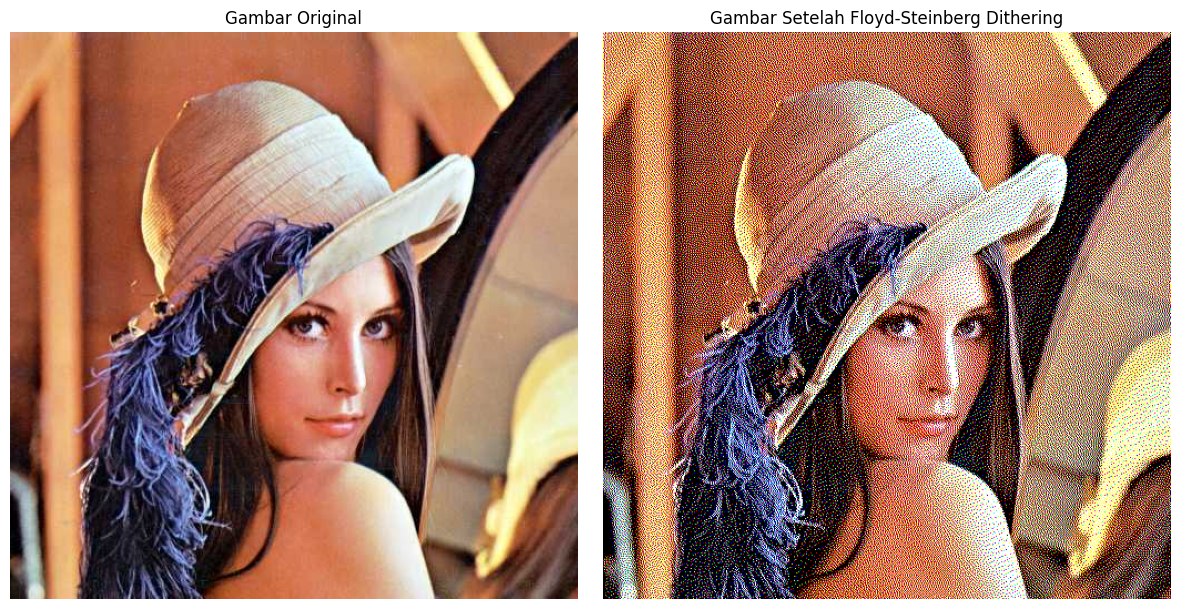

In [42]:
def floyd_steinberg_dithering_color(img):
    b, g, r = cv.split(img)

    dithered_r = np.zeros_like(r)
    dithered_g = np.zeros_like(g)
    dithered_b = np.zeros_like(b)

    def dithering_channel(channel, dithered_channel):
        height, width = channel.shape
        for y in range(height):
            for x in range(width):
                old_pixel = channel[y, x]
                new_pixel = 255 * (old_pixel // 128)
                dithered_channel[y, x] = new_pixel

                quant_error = old_pixel - new_pixel

                if x + 1 < width:
                    channel[y, x + 1] = np.clip(channel[y, x + 1] + quant_error * 7 / 16, 0, 255)
                if y + 1 < height:
                    if x > 0:
                        channel[y + 1, x - 1] = np.clip(channel[y + 1, x - 1] + quant_error * 3 / 16, 0, 255)
                    channel[y + 1, x] = np.clip(channel[y + 1, x] + quant_error * 5 / 16, 0, 255)
                    if x + 1 < width:
                        channel[y + 1, x + 1] = np.clip(channel[y + 1, x + 1] + quant_error * 1 / 16, 0, 255)

    dithering_channel(r, dithered_r)
    dithering_channel(g, dithered_g)
    dithering_channel(b, dithered_b)

    return cv.merge((dithered_b, dithered_g, dithered_r))

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

dithered_img = floyd_steinberg_dithering_color(img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Floyd-Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

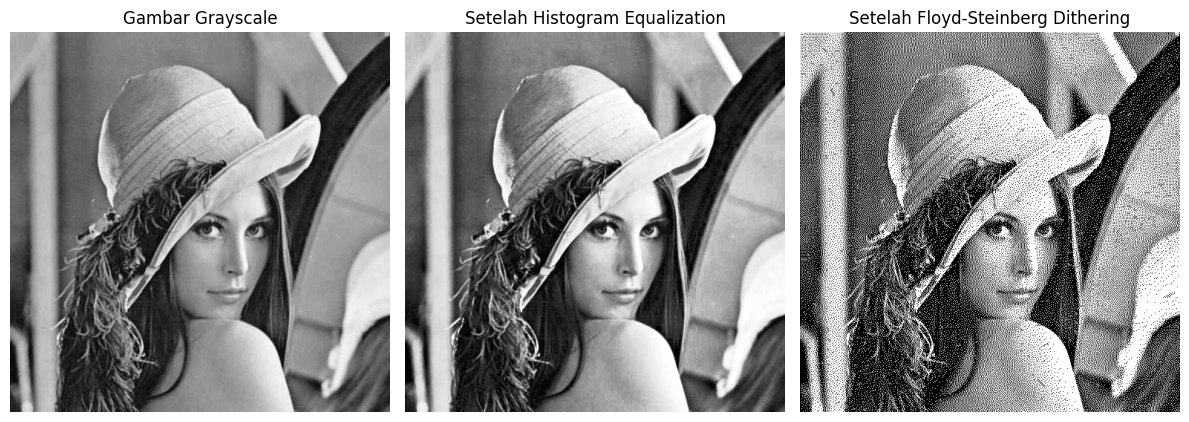

In [43]:
def floyd_steinberg_dithering(img):
    dithered = img.copy().astype(np.float32)
    height, width = img.shape

    for y in range(height):
        for x in range(width):
            old_pixel = dithered[y, x]
            new_pixel = 255 * (old_pixel // 128)
            dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < width:
                dithered[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:
                if x > 0:
                    dithered[y + 1, x - 1] += quant_error * 3 / 16
                dithered[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width:
                    dithered[y + 1, x + 1] += quant_error * 1 / 16

    return np.clip(dithered, 0, 255).astype(np.uint8)

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_equalized = cv.equalizeHist(img_gray)
dithered_img = floyd_steinberg_dithering(img_equalized)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title('Setelah Histogram Equalization')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dithered_img, cmap='gray')
plt.title('Setelah Floyd-Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()